In [1]:
# install nltk
# NLTK: Natural Language tool kit
!pip install nltk 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# install gensim
# Gensim is an open-source library for unsupervised topic modeling and natural language processing
# Gensim is implemented in Python and Cython.
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Import libraries

In [2]:
# import key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import plotly.express as px

# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [3]:
# Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [76]:
# load the stock news data
stock_df = pd.read_csv("/content/drive/My Drive/stock_sentiment.csv")

In [77]:
# Let's view the dataset 
stock_df

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
5786,Industry body CII said #discoms are likely to ...,0
5787,"#Gold prices slip below Rs 46,000 as #investor...",0
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1


### Check for missing values and data types

In [78]:
# dataframe information
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


In [79]:
# check for null values
stock_df.isnull().sum()

Text         0
Sentiment    0
dtype: int64

#### The dataset is unbalanced

In [80]:
stock_df.Sentiment.value_counts()

1    3685
0    2106
Name: Sentiment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


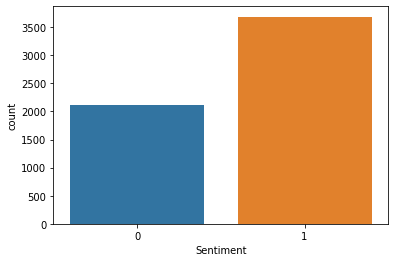

In [81]:
sns.countplot(stock_df.Sentiment)

### DATA PREPROCESSING. TEXT CLEANING. 
#### Remove punctuations, stopwwords, short words etc.

In [82]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [83]:
# function to remove punctuations
def remove_punc(message):
  punc_removed = [char for char in message if char not in string.punctuation]
  punc_removed_join = "".join(punc_removed)

  return punc_removed_join

In [84]:
# Let's remove punctuations from our dataset 
stock_df['Text Without Punctuation'] = stock_df.Text.apply(remove_punc)

In [85]:
stock_df

,Text,Sentiment,Text Without Punctuation
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...
3,MNTA Over 12.00,1,MNTA Over 1200
4,OI Over 21.37,1,OI Over 2137
...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...


In [86]:
# download stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [87]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year', 'https', 'httpstco'])


In [88]:
# Remove stopwords and remove short words (less than 3 characters)
def remove_stopwords(message):
  result = [token for token in gensim.utils.simple_preprocess(message) if token not in stop_words and len(token) >= 3]
  return result

In [89]:
# apply pre-processing to the text column
stock_df['Text without Punc & Stopwords'] = stock_df['Text Without Punctuation'].apply(remove_stopwords)

In [90]:
stock_df

,Text,Sentiment,Text Without Punctuation,Text without Punc & Stopwords
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,..."
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw..."
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop..."
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta]
4,OI Over 21.37,1,OI Over 2137,[]
...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s..."
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,..."
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri..."
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift..."


In [91]:
stock_df['Text without Punc & Stopwords'][0]

['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'trade',
 'method',
 'method',
 'see',
 'prev',
 'posts']

In [92]:
stock_df["Text without Punc & Stopwords Joined"] = stock_df["Text without Punc & Stopwords"].apply(lambda x: " ".join(x))
stock_df

,Text,Sentiment,Text Without Punctuation,Text without Punc & Stopwords,Text without Punc & Stopwords Joined
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",kickers watchlist xide tit soq pnk cpw bpz tra...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw...",movie return feageed indicator trades awesome
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop...",afraid short amzn looking like nearmonopoly eb...
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta],mnta
4,OI Over 21.37,1,OI Over 2137,[],
...,...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s...",industry body cii said discoms likely suffer n...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,...",gold prices slip investors book profits amid c...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri...",workers bajaj auto agreed wage cut period apri...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift...",sharemarket live sensex high points nifty test...


### **WORDCLOUD VISUALIZATION**

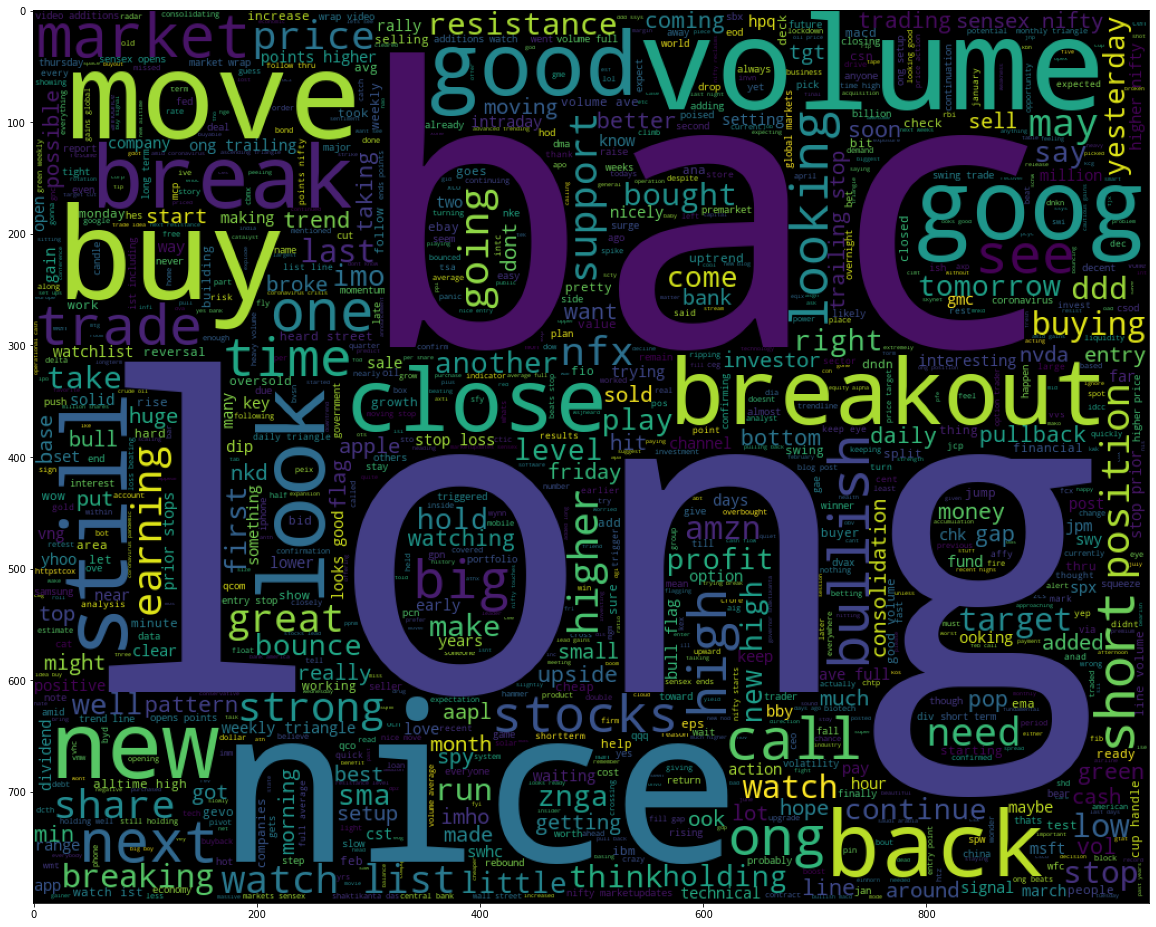

In [93]:
## Positive sentiment
fig = plt.figure(figsize=(20,20))
wc = WordCloud(max_words = 1000, width = 1000, height = 800).generate(" ".join(stock_df[stock_df.Sentiment == 1]['Text without Punc & Stopwords Joined']))
plt.imshow(wc) 

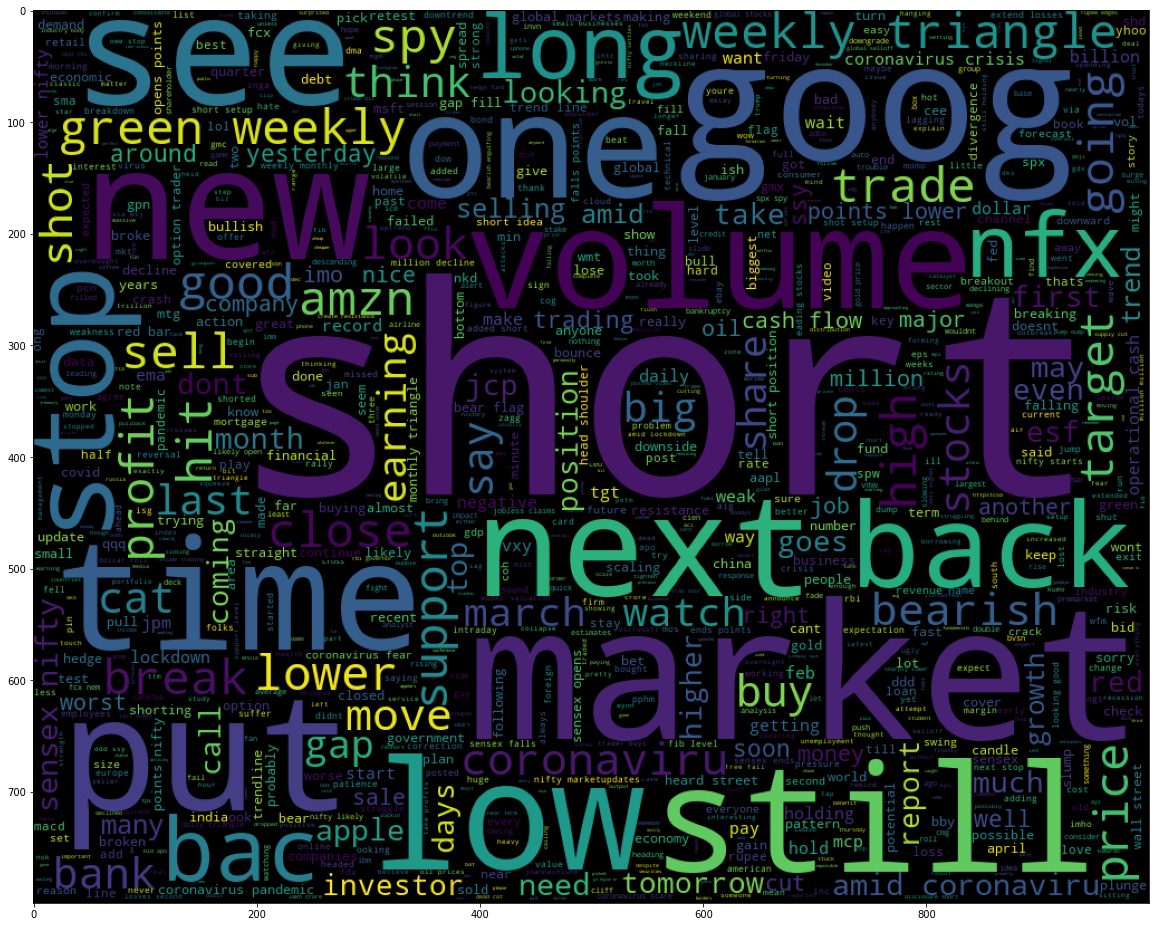

In [94]:
## Negative sentiment
fig = plt.figure(figsize=(20,20))
wc = WordCloud(max_words = 1000, width = 1000, height = 800).generate(" ".join(stock_df[stock_df.Sentiment == 0]['Text without Punc & Stopwords Joined']))
plt.imshow(wc)

In [179]:
stock_df

,Text,Sentiment,Text Without Punctuation,Text without Punc & Stopwords,Text without Punc & Stopwords Joined,Text without Punc & Stopwords Joined Lemmatized,Text without Punc & Stopwords Lemmatized
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",kickers watchlist xide tit soq pnk cpw bpz tra...,kicker watchlist xide tit soq pnk cpw bpz trad...,"[kicker, watchlist, xide, tit, soq, pnk, cpw, ..."
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw...",movie return feageed indicator trades awesome,movie return feageed indicator trade awesome,"[movie, return, feageed, indicator, trade, awe..."
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop...",afraid short amzn looking like nearmonopoly eb...,afraid short amzn look like nearmonopoly ebooks,"[afraid, short, amzn, look, like, nearmonopoly..."
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta],mnta,mnta,[mnta]
4,OI Over 21.37,1,OI Over 2137,[],,,[]
...,...,...,...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s...",industry body cii said discoms likely suffer n...,industry body cii say discoms likely suffer ne...,"[industry, body, cii, say, discoms, likely, su..."
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,...",gold prices slip investors book profits amid c...,gold price slip investor book profit amid coro...,"[gold, price, slip, investor, book, profit, am..."
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri...",workers bajaj auto agreed wage cut period apri...,worker bajaj auto agree wage cut period april ...,"[worker, bajaj, auto, agree, wage, cut, period..."
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift...",sharemarket live sensex high points nifty test...,sharemarket live sensex high point nifty test ...,"[sharemarket, live, sensex, high, point, nifty..."


### **Lemmatize**

In [169]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [170]:
# Lemmatize with POS Tag
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [171]:
lemmatizer = WordNetLemmatizer()

stock_df['Text without Punc & Stopwords Joined Lemmatized'] = stock_df['Text without Punc & Stopwords Joined'].apply(lambda x: ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in x.split()]))


In [178]:
stock_df['Text without Punc & Stopwords Lemmatized'] = stock_df['Text without Punc & Stopwords Joined Lemmatized'].apply(lambda x: x.split())

In [172]:
nltk.download('punkt') 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [173]:
# word_tokenize is used to break up a string into words
nltk.word_tokenize(stock_df['Text without Punc & Stopwords Joined Lemmatized'][0])

['kicker',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'trade',
 'method',
 'method',
 'see',
 'prev',
 'post']

In [174]:
# Obtain the maximum length of data in the document
# This will be later used when word embeddings are generated

lengths = stock_df['Text without Punc & Stopwords Joined Lemmatized'].apply(lambda x: len(nltk.word_tokenize(x)))
maxlen = max(lengths)
maxlen

20

In [175]:
lengths

0       14
1        6
2        7
3        1
4        0
        ..
5786    13
5787    10
5788    11
5789    13
5790    11
Name: Text without Punc & Stopwords Joined Lemmatized, Length: 5791, dtype: int64

In [176]:
fig = px.histogram(x = lengths, nbins = 50)
fig.show()

### **TOKENIZING AND PADDING**



In [181]:
# total = []
# j = 0
# for i in stock_df['Text without Punc & Stopwords Lemmatized']:
#   total.extend(i)
#   print(total)

#   j += 1
#   if j > 1:
#     break

In [182]:
# Obtain the total words present in the dataset
total_words = []
for i in stock_df['Text without Punc & Stopwords Lemmatized']:
  total_words.extend(i)
len(total_words)

44990

In [183]:
total_unique_words = list(set(total_words))
len(total_unique_words)

7993

In [245]:
# split the data into test and train 
# split the data into test and train 
X = stock_df['Text without Punc & Stopwords Lemmatized']
y = stock_df['Sentiment']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42, shuffle=True, stratify=y)

In [246]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(5211,) (5211,) (580,) (580,)


In [247]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = len(total_unique_words))
tokenizer.fit_on_texts(X_train)

# Training data
train_sequences = tokenizer.texts_to_sequences(X_train)

# Testing data
test_sequences = tokenizer.texts_to_sequences(X_test)


In [248]:
# train_sequences
# test_sequences

In [249]:
print("The encoding for document\n", X_train[1:2],"\n is: ", train_sequences[1])

The encoding for document
 2859    [itoilet, care, get, back]
Name: Text without Punc & Stopwords Lemmatized, dtype: object 
 is:  [3140, 663, 14, 22]


In [250]:
# Add padding to training and testing
padded_train = pad_sequences(train_sequences, maxlen = 20, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences, maxlen = 20, truncating = 'post')

In [251]:
for i, doc in enumerate(padded_train[:3]):
     print("The padded encoding for document:", i+1," is:", doc)

The padded encoding for document: 1  is: [1698  112 1699 1381 1382  662   94  432 3137 3138 3139    0    0    0
    0    0    0    0    0    0]
The padded encoding for document: 2  is: [3140  663   14   22    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
The padded encoding for document: 3  is: [1383  735 2173 2174 2175 3141 1700   19 1176 2176  805 3142    0    0
    0    0    0    0    0    0]


In [252]:
# Convert the data to categorical 2D representation
y_train_cat = to_categorical(y_train, 2)
y_test_cat = to_categorical(y_test, 2)

In [253]:
y_train_cat 

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

### MODEL FIT 

#### Check DNN first
#### Use LSTM next since such RNN's work well with sequence of texts

### DNN

In [254]:
embedding_dim = 512

model = tf.keras.Sequential([tf.keras.layers.Embedding(input_dim = len(total_unique_words), 
                             output_dim = embedding_dim, input_length = 20),
                             tf.keras.layers.Conv1D(128,5,activation='relu'),
                             tf.keras.layers.MaxPooling1D(pool_size=4),
                             tf.keras.layers.Dense(32, activation='relu'),
                             tf.keras.layers.Dense(1,activation='sigmoid')])

In [255]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [256]:
model.fit(padded_train, y_train, batch_size = 32, validation_split = 0.1, epochs = 5)

Epoch 1/5
147/147 [==============================] - 15s 99ms/step - loss: 0.6249 - accuracy: 0.6602 - val_loss: 0.6074 - val_accuracy: 0.6715
Epoch 2/5
147/147 [==============================] - 14s 97ms/step - loss: 0.5043 - accuracy: 0.7505 - val_loss: 0.6025 - val_accuracy: 0.6806
Epoch 3/5
147/147 [==============================] - 14s 97ms/step - loss: 0.3964 - accuracy: 0.8030 - val_loss: 0.6753 - val_accuracy: 0.6739
Epoch 4/5
147/147 [==============================] - 14s 98ms/step - loss: 0.3438 - accuracy: 0.8235 - val_loss: 0.8183 - val_accuracy: 0.6676
Epoch 5/5
147/147 [==============================] - 16s 108ms/step - loss: 0.3201 - accuracy: 0.8326 - val_loss: 0.8718 - val_accuracy: 0.6710


In [257]:
# model.predict(padded_test)
test_loss, test_accuracy = model.evaluate(padded_test, y_test)
print('Accuracy: %.2f' % (test_accuracy*100) )

19/19 [==============================] - 1s 27ms/step - loss: 0.7546 - accuracy: 0.6767
Accuracy: 67.67


### LSTM

In [272]:
embedding_dim = 512

model = tf.keras.Sequential([tf.keras.layers.Embedding(input_dim = len(total_unique_words), 
                             output_dim = embedding_dim, input_length = 20),
                             tf.keras.layers.LSTM(256),
                            #  tf.keras.layers.LSTM(128),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(1,activation='sigmoid')])

In [273]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [274]:
model.fit(padded_train, y_train, batch_size = 32, validation_split = 0.1, epochs = 5)

Epoch 1/5
147/147 [==============================] - 43s 275ms/step - loss: 0.6044 - accuracy: 0.6856 - val_loss: 0.5299 - val_accuracy: 0.7222
Epoch 2/5
147/147 [==============================] - 36s 243ms/step - loss: 0.3650 - accuracy: 0.8578 - val_loss: 0.5180 - val_accuracy: 0.7548
Epoch 3/5
147/147 [==============================] - 38s 260ms/step - loss: 0.2187 - accuracy: 0.9183 - val_loss: 0.6631 - val_accuracy: 0.7529
Epoch 4/5
147/147 [==============================] - 36s 243ms/step - loss: 0.1633 - accuracy: 0.9431 - val_loss: 0.6656 - val_accuracy: 0.7605
Epoch 5/5
147/147 [==============================] - 35s 241ms/step - loss: 0.1179 - accuracy: 0.9561 - val_loss: 0.8039 - val_accuracy: 0.7375


In [275]:
# model.predict(padded_test)
test_loss, test_accuracy = model.evaluate(padded_test, y_test)
print('Accuracy: %.2f' % (test_accuracy*100) )

19/19 [==============================] - 1s 48ms/step - loss: 0.6177 - accuracy: 0.7034
Accuracy: 70.34


### CNN + LSTM 

In [258]:
model = tf.keras.Sequential([tf.keras.layers.Embedding(input_dim = len(total_unique_words), 
                             output_dim = embedding_dim, input_length = 20),
                             tf.keras.layers.Conv1D(128,5,activation='relu'),
                             tf.keras.layers.MaxPooling1D(pool_size=4),
                             tf.keras.layers.LSTM(256), 
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dropout(0.3),
                             tf.keras.layers.Dense(1,activation='sigmoid')])

In [259]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [260]:
model.fit(padded_train, y_train, batch_size = 32, validation_split = 0.1, epochs = 5)

Epoch 1/5
147/147 [==============================] - 21s 122ms/step - loss: 0.5747 - accuracy: 0.7031 - val_loss: 0.4884 - val_accuracy: 0.7663
Epoch 2/5
147/147 [==============================] - 20s 137ms/step - loss: 0.2994 - accuracy: 0.8861 - val_loss: 0.4929 - val_accuracy: 0.7759
Epoch 3/5
147/147 [==============================] - 17s 119ms/step - loss: 0.1059 - accuracy: 0.9642 - val_loss: 0.7329 - val_accuracy: 0.7682
Epoch 4/5
147/147 [==============================] - 17s 118ms/step - loss: 0.0473 - accuracy: 0.9814 - val_loss: 0.6878 - val_accuracy: 0.7950
Epoch 5/5
147/147 [==============================] - 18s 120ms/step - loss: 0.0418 - accuracy: 0.9851 - val_loss: 0.8052 - val_accuracy: 0.7874


In [261]:
# model.predict(padded_test)
test_loss, test_accuracy = model.evaluate(padded_test, y_test)
print('Accuracy: %.2f' % (test_accuracy*100) )

19/19 [==============================] - 0s 15ms/step - loss: 0.5836 - accuracy: 0.7155
Accuracy: 71.55


In [267]:
# model.predict(padded_test)
y_pred = (model.predict(padded_test) > 0.5).astype(int)

,precision,recall,f1-score,support
0,0.657534,0.454976,0.537815,211.000000
1,0.735023,0.864499,0.794521,369.000000
accuracy,0.715517,0.715517,0.715517,0.715517
macro avg,0.696279,0.659737,0.666168,580.000000
weighted avg,0.706833,0.715517,0.701133,580.000000


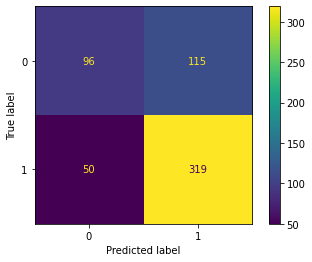

In [268]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

plt.grid(False)

df = pd.DataFrame(classification_report(y_test, y_pred, digits=2 , output_dict=True)).T
df